In [ ]:
pip install pandas matplotlib

timestamp     0
userId        0
nick          0
twitter       0
dob           0
country      10
dtype: int64
-----------------
timestamp    2393
userId       2393
nick         2393
twitter      2393
dob          2250
country       240
dtype: int64


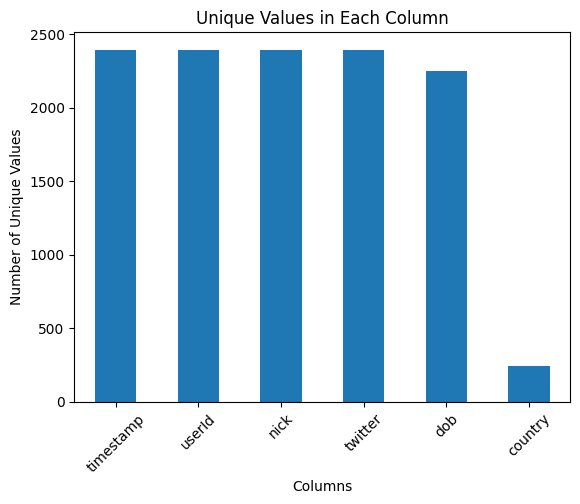

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

userData = pd.read_csv('/content/drive/MyDrive/flamingo-data/users.csv')
userSessionData = pd.read_csv('/content/drive/MyDrive/flamingo-data/user-session.csv')
user_null_values = userData.isnull().sum()
user_session_null_values = userSessionData.isnull().sum()
print(user_null_values)
#print(user_session_null_values)
print("-----------------")
unique_values = userData.nunique()
print(unique_values)


unique_values.plot(kind='bar')
plt.title('Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.show()


2340


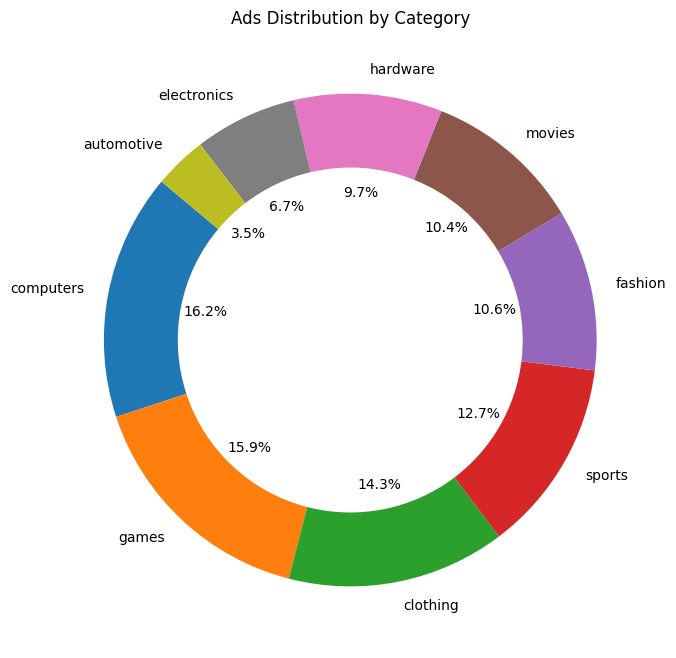

In [ ]:

adsData = pd.read_csv('/content/drive/MyDrive/flamingo-data/ad-clicks.csv')
df_cat = pd.DataFrame(adsData)

# Counting the number of users (occurrences) for each country
user_counts = df_cat['adCategory'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
user_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Ads Distribution by Category')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

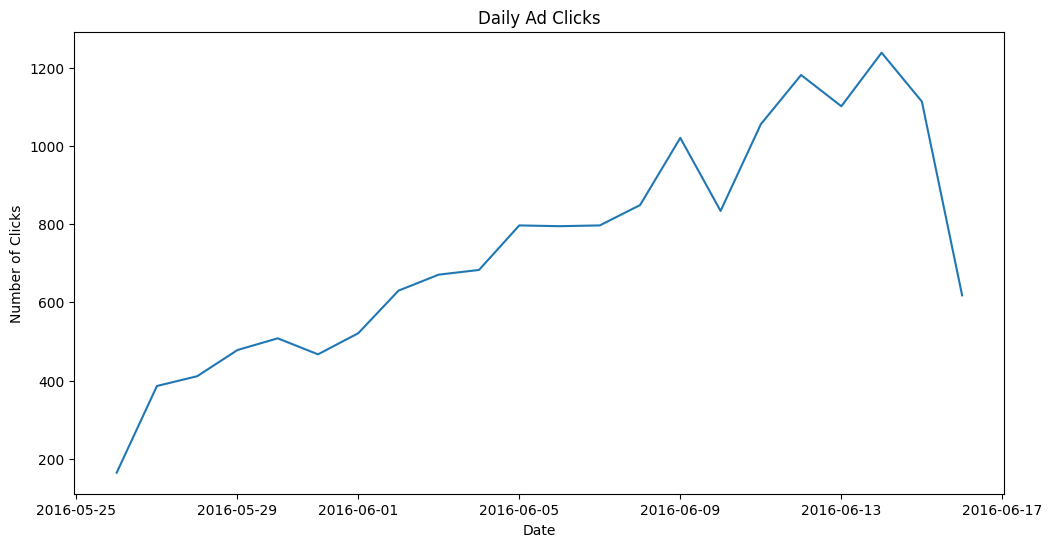

In [ ]:
import seaborn as sns

df_ad_clicks = pd.read_csv('/content/drive/MyDrive/flamingo-data/ad-clicks.csv')

df_ad_clicks['timestamp'] = pd.to_datetime(df_ad_clicks['timestamp'])
df_ad_clicks['date'] = df_ad_clicks['timestamp'].dt.date
daily_clicks = df_ad_clicks.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_clicks.plot(title='Daily Ad Clicks')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.show()

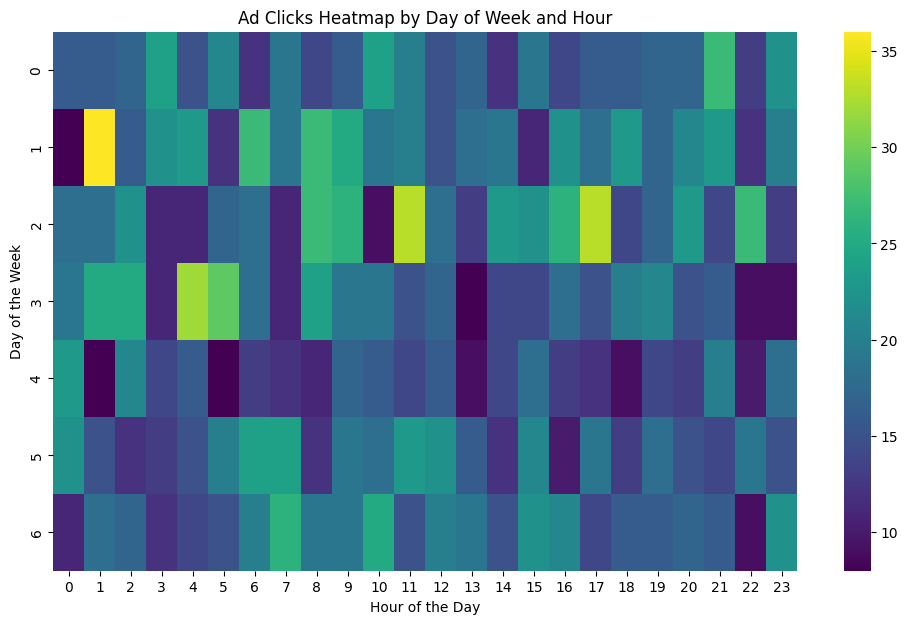

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_ad_clicks['timestamp'] = pd.to_datetime(df_ad_clicks['timestamp'])

df_ad_clicks['weekday'] = df_ad_clicks['timestamp'].dt.weekday
df_ad_clicks['hour'] = df_ad_clicks['timestamp'].dt.hour

heatmap_data = df_ad_clicks.pivot_table(index='weekday', columns='hour', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Ad Clicks Heatmap by Day of Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

df_ad_clicks = pd.read_csv('/content/drive/MyDrive/flamingo-data/ad-clicks.csv')
df_ad_clicks['timestamp'] = pd.to_datetime(df_ad_clicks['timestamp'])

df_ad_clicks['hour'] = df_ad_clicks['timestamp'].dt.hour
df_ad_clicks['day_of_week'] = df_ad_clicks['timestamp'].dt.dayofweek
df_ad_clicks['month'] = df_ad_clicks['timestamp'].dt.month
df_ad_clicks = df_ad_clicks.drop('timestamp', axis=1)

label_encoder = LabelEncoder()
categorical_columns = ['your_other_categorical_columns_here']
for column in categorical_columns:
    if column in df_ad_clicks.columns:
        df_ad_clicks[column] = label_encoder.fit_transform(df_ad_clicks[column])

X = df_ad_clicks.drop('adCategory', axis=1)
y = df_ad_clicks['adCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


y_pred = decision_tree.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0 492   0   0   0   0   0   0   0]
 [  0   0 537   0   0   0   0   0   0]
 [  0   0   0 220   0   0   0   0   0]
 [  0   0   0   0 324   0   0   0   0]
 [  0   0   0   0   0 496   0   0   0]
 [  0   0   0   0   0   0 304   0   0]
 [  0   0   0   0   0   0   0 339   0]
 [  0   0   0   0   0   0   0   0 433]]

Classification Report:
               precision    recall  f1-score   support

  automotive       1.00      1.00      1.00       120
    clothing       1.00      1.00      1.00       492
   computers       1.00      1.00      1.00       537
 electronics       1.00      1.00      1.00       220
     fashion       1.00      1.00      1.00       324
       games       1.00      1.00      1.00       496
    hardware       1.00      1.00      1.00       304
      movies       1.00      1.00      1.00       339
      sports       1.00      1.00      1.00       433

    accuracy                           1.00    

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(decision_tree, X, y, cv=5)

cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()

print("CV Scores: ", cv_scores)
print("Mean CV Score: ", cv_scores_mean)
print("Standard Deviation in CV Scores: ", cv_scores_std)

CV Scores:  [1. 1. 1. 1. 1.]
Mean CV Score:  1.0
Standard Deviation in CV Scores:  0.0


In [1]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jre-headless amd64 8u402-ga-2ubuntu1~22.04 [30.8 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jdk-headless amd64 8u402-ga-2ubuntu1~22.04 [8,873 kB]

In [2]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2024-05-13 00:04:19--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  17.3MB/s    in 38s     

2024-05-13 00:04:58 (6.85 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [3]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [4]:
!pip install -q findspark

In [14]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

import findspark
findspark.init()
findspark.find()

import pyspark
import numpy as np
import pandas as pd

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, hour, dayofweek, month, to_timestamp

spark = SparkSession.builder.master('local[*]').appName('adsclick').getOrCreate()

import urllib.request

url = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/ad-clicks.csv"

file_path = "/tmp/ad-clicks.csv"

urllib.request.urlretrieve(url, file_path)

df_ad_clicks = spark.read.csv(file_path, sep=',', header=True, inferSchema=True)
df_ad_clicks.show(10)

df_ad_clicks = df_ad_clicks.withColumn('timestamp', to_timestamp(col('timestamp')))


df_ad_clicks = df_ad_clicks.withColumn('hour', hour(col('timestamp')))
df_ad_clicks = df_ad_clicks.withColumn('day_of_week', dayofweek(col('timestamp')))
df_ad_clicks = df_ad_clicks.withColumn('month', month(col('timestamp')))


df_ad_clicks = df_ad_clicks.drop('timestamp')


df_ad_clicks.filter('adCategory IS NULL')

ads_valid_delay = df_ad_clicks.filter('delay IS NOT NULL')

ads_none_missing = df_ad_clicks.dropna()
print(ads_none_missing.count())

In [29]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

from pyspark.sql.functions import year, month, dayofmonth, lit, datediff, current_date
from pyspark.sql.types import IntegerType
import pyspark
import numpy as np
import pandas as pd

import urllib.request

urlone = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/users.csv"
urltwo = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/buy-clicks.csv"
file_path_one = "/tmp/users.csv"
file_path_two = "/tmp/buy-clicks.csv"

urllib.request.urlretrieve(urlone, file_path_one)
urllib.request.urlretrieve(urltwo, file_path_two)

users_df = spark.read.csv(file_path_one, header=True, inferSchema=True)
buy_clicks_df = spark.read.csv(file_path_two, header=True, inferSchema=True)
from pyspark.sql.functions import col, to_date
# Show DataFrame column names
print(users_df.columns)

df = users_df.withColumn('dob', to_date(col('dob'), 'yyyy-MM-dd'))

currentYear = year(current_date())
birthYear = year(col('dob'))
df = df.withColumn('age', (currentYear - birthYear).cast(IntegerType()))
from pyspark.sql.functions import when
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler


df = df.withColumn('label', when(df['country'] == 'US', 1).otherwise(0))
indexer_country = StringIndexer(inputCol='country', outputCol='countryIndex', handleInvalid='keep')
encoder = OneHotEncoder(inputCols=['countryIndex'], outputCols=['countryVec'])

assembler = VectorAssembler(
    inputCols=['countryVec', 'age'],
    outputCol='features')

dt = DecisionTreeClassifier(featuresCol='features', labelCol='label', maxBins=230)
pipeline = Pipeline(stages=[indexer_country, encoder, assembler, dt])
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)
pipelineModel = pipeline.fit(train_data)


from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = pipelineModel.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy of Decision Tree model: {accuracy:.2f}")

treeModel = pipelineModel.stages[-1]

print(treeModel.toDebugString)

def print_tree_rules(tree):
    tree_string = tree.toDebugString
    rules = tree_string.split('If')
    formatted_rules = ['If' + rule for rule in rules if rule.strip()]
    for rule in formatted_rules:
        print(rule.strip())

print_tree_rules(treeModel)


['timestamp', 'userId', 'nick', 'twitter', 'dob', 'country']
Accuracy of Decision Tree model: 1.00
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_35771ea527d7, depth=1, numNodes=3, numClasses=2, numFeatures=242
  If (feature 96 in {0.0})
   Predict: 0.0
  Else (feature 96 not in {0.0})
   Predict: 1.0

IfDecisionTreeClassificationModel: uid=DecisionTreeClassifier_35771ea527d7, depth=1, numNodes=3, numClasses=2, numFeatures=242
If (feature 96 in {0.0})
   Predict: 0.0
  Else (feature 96 not in {0.0})
   Predict: 1.0


In [30]:
import pandas as pd

urlone = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/users.csv"
urltwo = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/ad-clicks.csv"
urlthree = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/buy-clicks.csv"
file_path_one = "/tmp/users.csv"
file_path_two = "/tmp/ad-clicks.csv"
file_path_three = "/tmp/buy-clicks.csv"

urllib.request.urlretrieve(urlone, file_path_one)
urllib.request.urlretrieve(urltwo, file_path_two)
urllib.request.urlretrieve(urlthree, file_path_three)

users_df = spark.read.csv(file_path_one, header=True, inferSchema=True)
ad_clicks_df = spark.read.csv(file_path_two, header=True, inferSchema=True)
buy_clicks_df = spark.read.csv(file_path_three, header=True, inferSchema=True)



df = buy_clicks_df.join(ad_clicks_df, ad_clicks_df.userId == buy_clicks_df.userId)
df = buy_clicks_df.join(ad_clicks_df, 'userId')

#merged_df.show()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Predicting User Purchases") \
    .getOrCreate()

from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

df = df.withColumn("price", (df.price > 0).cast("integer"))

indexer = StringIndexer(inputCols=["adCategory"], outputCols=["adCategoryIndex"])
assembler = VectorAssembler(inputCols=["adCategoryIndex", "teamId", "adId"], outputCol="features")

pipeline = Pipeline(stages=[indexer, assembler])


df_transformed = pipeline.fit(df).transform(df)

(train_data, test_data) = df_transformed.randomSplit([0.8, 0.3])

from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="price", featuresCol="features")
dtModel = dt.fit(train_data)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = dtModel.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol="price")
accuracy = evaluator.evaluate(predictions)

print("Accuracy: ", accuracy)

treeModel = dtModel.bestModel if hasattr(dtModel, "bestModel") else dtModel


Accuracy:  1.0


+------+-------------------+-----+-------------+----+-----+-----+-------------------+----+-------------+------+----+-----------+
|userId|          timestamp| txId|userSessionId|team|buyId|price|          timestamp|txId|userSessionId|teamId|adId| adCategory|
+------+-------------------+-----+-------------+----+-----+-----+-------------------+----+-------------+------+----+-----------+
|   611|2016-06-15 12:06:54|37947|        34327|  27|    5| 20.0|2016-05-26 15:13:22|5974|         5809|    27|   2|electronics|
|   611|2016-06-13 02:36:54|32796|        26524|  27|    4| 10.0|2016-05-26 15:13:22|5974|         5809|    27|   2|electronics|
|   611|2016-06-11 02:06:54|29101|        26524|  27|    4| 10.0|2016-05-26 15:13:22|5974|         5809|    27|   2|electronics|
|   611|2016-06-07 12:06:54|22930|        20644|  27|    5| 20.0|2016-05-26 15:13:22|5974|         5809|    27|   2|electronics|
|   611|2016-06-03 18:36:54|17005|        15910|  27|    4| 10.0|2016-05-26 15:13:22|5974|       

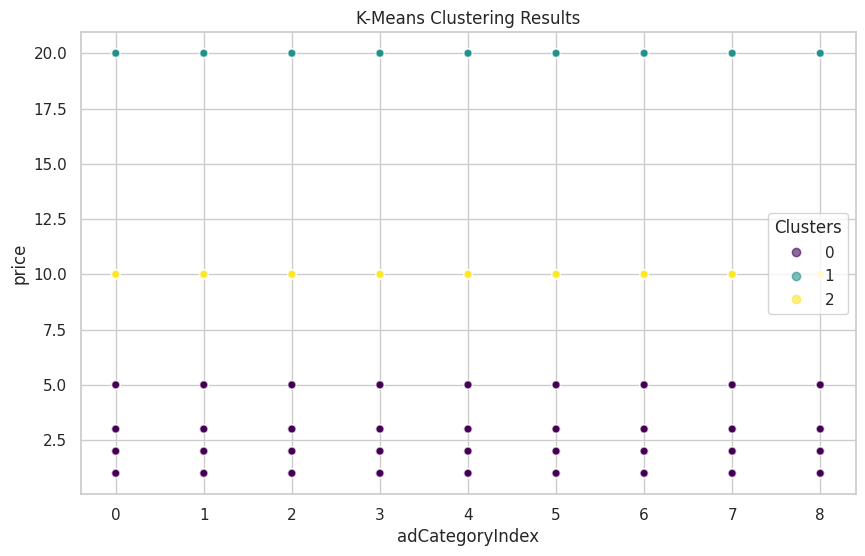

In [31]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("K-Means Clustering Ad Category") \
    .getOrCreate()


import pandas as pd


urlone = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/ad-clicks.csv"
urltwo = "https://raw.githubusercontent.com/MuhammadIrfan5/bigaatamanagementneo/main/buy-clicks.csv"
file_path_one = "/tmp/ad-clicks.csv"
file_path_two = "/tmp/buy-clicks.csv"

urllib.request.urlretrieve(urlone, file_path_one)
urllib.request.urlretrieve(urltwo, file_path_two)

ad_clicks_df = spark.read.csv(file_path_one, header=True, inferSchema=True)
buy_clicks_df = spark.read.csv(file_path_two, header=True, inferSchema=True)

df = buy_clicks_df.join(ad_clicks_df,"userId","inner")
#df = buy_clicks_df.join(ad_clicks_df, 'userId')

df.show()

from pyspark.ml.feature import StringIndexer, VectorAssembler


indexer = StringIndexer(inputCol="adCategory", outputCol="adCategoryIndex")
df = indexer.fit(df).transform(df)


assembler = VectorAssembler(inputCols=["adCategoryIndex", "price"], outputCol="features")
df = assembler.transform(df)

from pyspark.ml.clustering import KMeans


kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(df.select('features'))


predictions = model.transform(df)


predictions.select("features", "prediction").show()

pandas_df = predictions.select("features", "prediction").toPandas()

pandas_df['price'] = pandas_df['features'].apply(lambda x: x[0])
pandas_df['adCategoryIndex'] = pandas_df['features'].apply(lambda x: x[1])

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pandas_df['price'], pandas_df['adCategoryIndex'], c=pandas_df['prediction'], cmap='viridis', alpha=0.6, edgecolors='w')

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('K-Means Clustering Results')
plt.xlabel('adCategoryIndex')
plt.ylabel('price')
plt.show()


